# U.S. Medical Insurance Costs


## Introduction

This work is made of **CodeCademy** capstone project, which is at about 25% of the course in *Data Science*.
In this file I am going to analyze data taken from the Medical Cost Personal Datasets provided on Kaggle.
I am learning Python, I know that I could use different libraries such as `numpy` or `pandas`, but I am using the methods I have learned so far! :)


## Purpose

The purpose of this analysis is to give an overview of the data provided.
I am going to explore:
- is there a bias towards gender?
- what is the maximum, minimum and average age of the individuals?
- what is the correlation between BMI and age?
- how many people are smokers?
- what is the age of smokers and non smokers?
- what is the distribution of people in the 4 different regions?
- I will try also to find the correlation between the charges and the other variables


## Data

Data are provided in a `.csv` file that I import using the `csv` library.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [2]:
insurance = []

with open('/kaggle/input/insurance/insurance.csv') as insurance_file:
    insurance_reader = csv.DictReader(insurance_file)
    for row in insurance_reader:
        insurance.append(row)

age = []
bmi = []
sex = []
children = []
smoker = []
region = []
charges = []


for i in range(len(insurance)):
    age.append(int(insurance[i]['age']))
    bmi.append(float(insurance[i]['bmi']))
    sex.append(insurance[i]['sex'])
    children.append(int(insurance[i]['children']))
    smoker.append(insurance[i]['smoker'])
    region.append(insurance[i]['region'])
    charges.append(float(insurance[i]['charges']))
len(age)

1338

There are 1338 data of individuals, with the following information:
- age
- BMI
- Sex
- number of children
- smoker or non smoker
- region: Northwest, Northeast, Southwest, Southeast
- insurance cost

## Analysis

### Is there a bias towards gender?

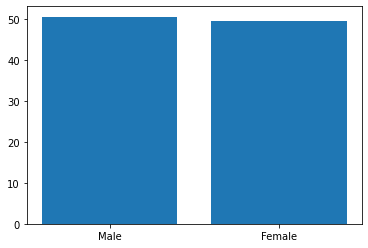

Male: 51%, Female: 49%


In [3]:
male_perc = sex.count("male")/len(sex)*100
female_perc = sex.count("female")/len(sex)*100


x = ['Male', 'Female']
y = [male_perc, female_perc]
plt.bar(x, y)
plt.show()

print('Male: {male_perc}%, Female: {female_perc}%'.format(male_perc=round(male_perc),female_perc=round(female_perc) ))

The number of males and females is almost similar. There is no bias towards gender.

### Age distribution

In [4]:
min_age = min(age)
max_age = max(age)
mean_age = sum(age)/len(age)
print('Minimum age: {min_age}, Maximum age: {max_age}, Mean: {mean_age}'.format(min_age=min_age, max_age=max_age, mean_age=round(mean_age)))

Minimum age: 18, Maximum age: 64, Mean: 39


### Relation between Age and BMI

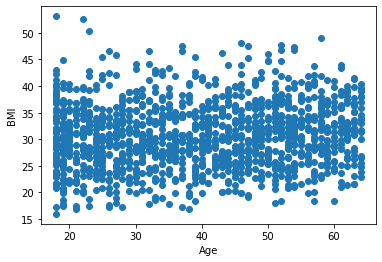

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

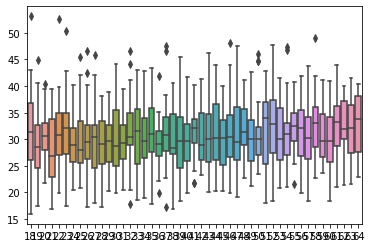

In [5]:
plt.scatter(age, bmi)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()
sns.boxplot(age,bmi)

There is no particular correlation between BMI and age, althoug we can see that the greatest part of BMI values, for all ages lie between 23 and 37

### How many people are smoking?

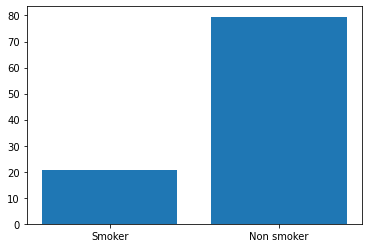

Smoker: 20%, Non smoker: 80%


In [6]:
smoker_perc = smoker.count('yes')/len(smoker)*100
non_smoker_perc = smoker.count('no')/len(smoker)*100

x = ['Smoker', 'Non smoker']
y = [smoker_perc, non_smoker_perc]
plt.bar(x, y)
plt.show()

print('Smoker: {smoker_perc}%, Non smoker: {non_smoker_perc}%'.format(smoker_perc=round(smoker_perc),non_smoker_perc=round(non_smoker_perc) ))


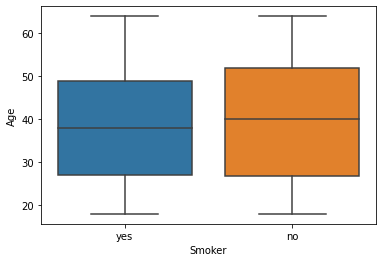

In [7]:
ax = sns.boxplot(x=smoker, y=age)

ax.set(xlabel='Smoker', ylabel='Age')

plt.show()

80% of individuals are non-smoker. 

The maximum and mean age of smoker people is less than non-smokers

### How are people distributed in the regions?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


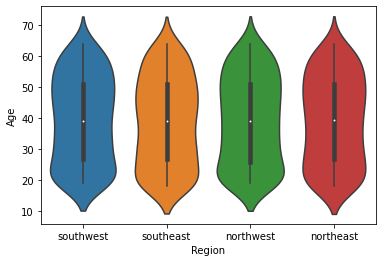

In [8]:

ax = sns.violinplot(region, age)
ax.set(xlabel='Region', ylabel='Age')
plt.show()


There is no fundamental difference of population age among the different regions

### What is the correlation of age and number of children?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


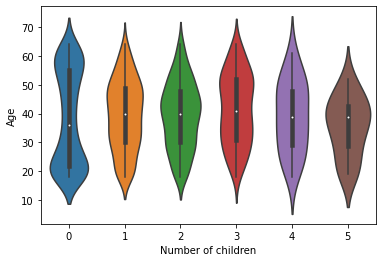

In [9]:
#ax = sns.violinplot(x=children, y=age, 
     #         color = 'black')

ax = sns.violinplot(children, age)
ax.set(xlabel='Number of children', ylabel='Age')

plt.show()

A great percentage of individuals below 20 years and above 55 have no children.

The highest percentage of individuals having 5 children are about 40 years old.

The mean age of people having at least one child is about 40 years.

### Correlation between variables and charges

#### Number of children

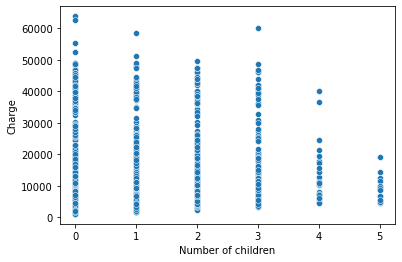

In [10]:
ax = sns.scatterplot(x=children, y=charges)
ax.set(xlabel='Number of children', ylabel='Charge')
plt.show()


No particular correlation, even though it could appear that more the children, less the charges.

#### Smoking habits

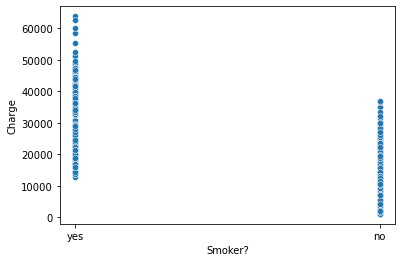

In [11]:
ax = sns.scatterplot(x=smoker, y=charges)
ax.set(xlabel='Smoker?', ylabel='Charge')
plt.show()

Non smokers have lower charges, while smokers have higher charges.

#### Age

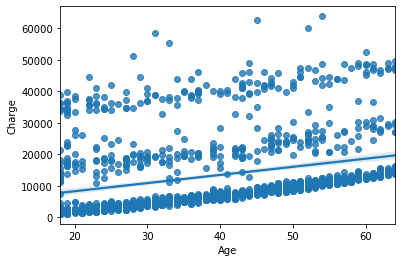

In [12]:
ax = sns.regplot(x=age, y=charges)
ax.set(xlabel='Age', ylabel='Charge')
plt.show()

Higher the age, higher the charges, there seems to be a linear correlation.

#### BMI

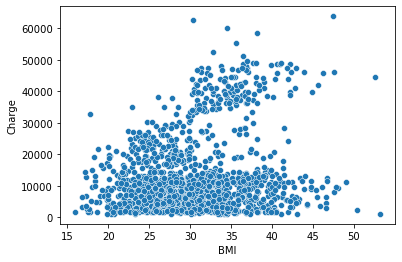

In [13]:
ax = sns.scatterplot(x=bmi, y=charges)
ax.set(xlabel='BMI', ylabel='Charge')
plt.show()

There seem to be a linear relation

#### Region

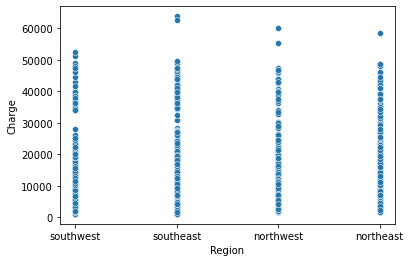

In [14]:
ax = sns.scatterplot(x=region, y=charges)
ax.set(xlabel='Region', ylabel='Charge')
plt.show()

There are no significant differences in regions

#### Sex

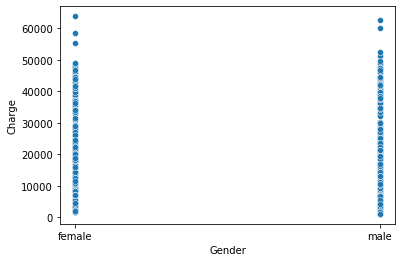

In [15]:
ax = sns.scatterplot(x=sex, y=charges)
ax.set(xlabel='Gender', ylabel='Charge')
plt.show()

There are no significant differences, even though it may seem that male have higher charges than female.

Let's explore that with a box plot

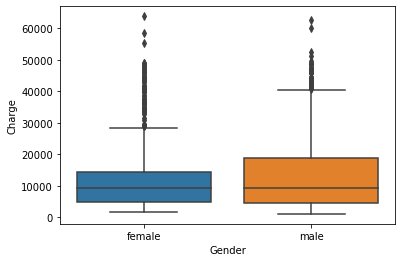

In [16]:
ax = sns.boxplot(x=sex, y=charges)
ax.set(xlabel='Gender', ylabel='Charge')
plt.show()

## Modelling

To start modelling I need to convert in numbers the sex, the smoking status and the region.

In [17]:
smoker = [0 if i=='no' else 1 for i in smoker]
sex = [0 if i=='female' else 1 for i in sex]
region = [0 if i=='southwest' else 1 if i=='southeast' else 2 if i=='northwest' else 3 for i in region]

In [18]:
from sklearn import linear_model

In [19]:
X = pd.DataFrame({"age": age, "sex": sex, "bmi": bmi, "children": children, "smoker": smoker, "region": region})
y = pd.DataFrame(charges)


regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [20]:
regr.score(X, y)

0.7507372027994937

So the equation to obtain the charges based on the above data is (coefficient rounded):

In [21]:
print('Charges = {a}*Age {b}*Sex + {c}*BMI + {d}*Children + {e}*Smoker + {f}*Region {g}'.format(a=round(regr.coef_[0][0],1),b=round(regr.coef_[0][1],1), c=round(regr.coef_[0][2],1), d=round(regr.coef_[0][3],1), e=round(regr.coef_[0][4],1), f=round(regr.coef_[0][5],1), g=round(regr.intercept_[0],1)  ))

Charges = 257.3*Age -131.1*Sex + 332.6*BMI + 479.4*Children + 23820.4*Smoker + 353.6*Region -12876.4
